# <h1 style="color:green; text-align:center;"> Exercise 6 - AQI Data Preparation</h1> 

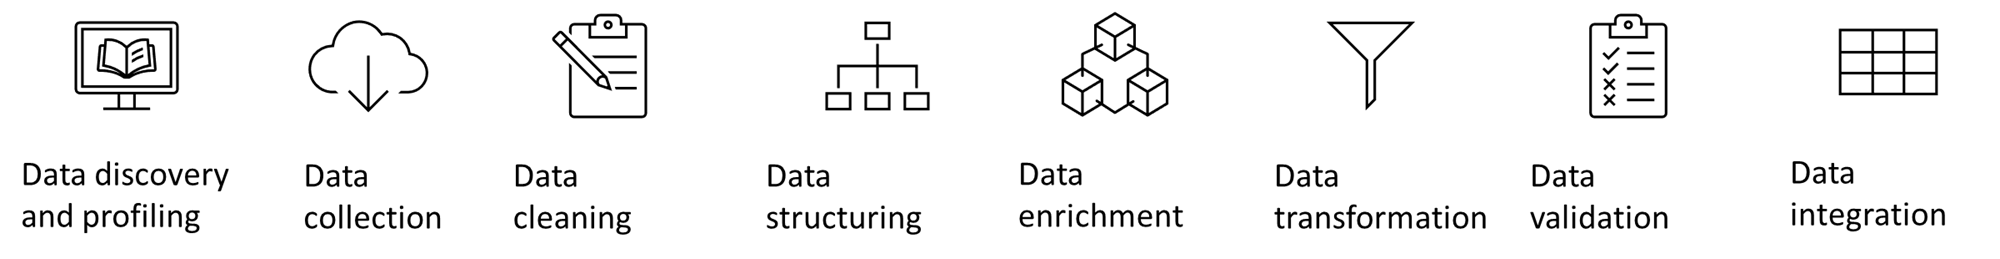
This lesson was developed with assistance from GPT-4-1106-preview, claude-2.1, and GPT-3.5-turbo.

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/aselshall/eds/HEAD)

---

## 1. Problem definition

What is the impact of COVID19 lockdown orders on air quality in Miami?

## 2. Data requirements

We need to collect daily air quality data for parameters such as PM2.5, PM10, NO2, SO2, and CO in csv format from 2019 to 2021. That is one year before and one year after the lockdown orders of COVID 19 in April 2020. [EPA Air Data](https://www.epa.gov/outdoor-air-quality-data)  contains air quality data collected at outdoor monitors across the US.

## 3. Data preparation 

- Data discovery and profiling: Exploring the content, quality, and structure of the dataset
- Data collection: Gathering raw data from various sources for analysis
- Data cleaning: Standardizing inconsistent data formats, correcting errors, and handling missing values
- Data structuring: Organizing data for efficient storage and retrieval
- Data enrichment: Enhancing dataset with additional information from external sources to improve analysis 
- Data transformation: Optimizing the content and structure of data for further analysis
- Data validation: Ensuring the accuracy, completeness, and reliability of the data
- Data integration: Combining data from multiple sources to create a unified dataset for analysis

### 3.1 Data discovery and profiling

In this step we are exploring the content, quality, and structure of the dataset. From this step we can learn the following.
- [EPA Air Data](https://www.epa.gov/outdoor-air-quality-data)  contains air quality data collected at outdoor monitors across the US.
- For this exercise we want to use [Pre-Generated Data Files - Daily Data](https://aqs.epa.gov/aqsweb/airdata/download_files.html#Daily).
- For each year one data quality parameter (e.g., NO2, SO2, and CO) is recorded in a csv file.
- The dataset have 16 air quality parameters.
- For three years, there are 48 csv files and each file is about 60 MB. That is approximately 3 GB of data. 

### 3.2 Data collection

In this step we want to gather raw data for analysis The breakdown of this step is as follows.
- We need to collect data for 16 air quality parameters for three years from [Pre-Generated Data Files - Daily Data](https://aqs.epa.gov/aqsweb/airdata/download_files.html#Daily) that is 48 files
- Each file is in csv format and zipped
- We can use Python tools for making HTTP requests such as `request` package
- We can use Python tools for unzipping files such as `zipfile` package
- Each file is large than 60MB, so the download and processing of raw data can be long

### 3.3 Data cleaning

This step involves standardizing inconsistent data formats, correcting errors, and handling missing values. For this step we will do the following:
- For this EPA data, cleaning is minimal
- We will record the files that has no records for our study area and period
- We do not need to do anything about missing data at this stage

### 3.4 Data structuring

This steps involves organizing and formating the data in a way that is optimal for storage and retrieval. For this step we need to do the following tasks. 
- To reduce storage space, we will filter out rows outside our study region
- We will only keep relevant columns for our record and analysis that are: 'County Code', 'Parameter Name', 'Date Local', 'Units of Measure', 'Arithmetic Mean', 'CBSA Name'.
- This will reduce the storgage space per file from from ~60 MB to ~0.4 MB.

Note: A core-based statistical area (CBSA) is a geographic region of the U.S.as defined by the Office of Management and Budget.A CBSA is "one or more adjacent counties or county equivalents that have at least one urban core area of at least 10,000 population, plus adjacent territory that has a high degree of social and economic integration with the core as measured by commuting ties" (Wikipedia). 

After conducting an initial data exploration and profiling, we can formulate a prompt  our language model to assist with data collection, cleaning, and structuring. Here is a prompot:

**Python code with rich annotations:**  
This code  collects air quality data in a `region` for one year before and one year after the lockdown order on April 1, 2020. 

These are the FileIDs of the air quality data that we want to download:
| Category                         | Parameter                     | FileID | Unit | Records |
|----------------------------------|-------------------------------|--------|------|---|
| Criteria Gases                   | Ozone                         | 44201  | na  | 0 |
| Criteria Gases                   | SO2                           | 42401  | na | 0 |
| Criteria Gases                   | CO                            | 42101  | na | 0 |
| Criteria Gases                   | NO2                           | 42602  | na | 0 |
| Particulates                     | PM2.5 FRM/FEM Mass            | 88101  | na | 0 |
| Particulates                     | PM2.5 non FRM/FEM Mass        | 88502  | na | 0 |
| Particulates                     | PM10 Mass                     | 81102  | na | 0 |
| Particulates                     | PMc Mass                      | 86101  | na | 0 |
| Meteorological                   | Winds                         | WIND   | na | 0 |
| Meteorological                   | Temperature                   | TEMP   | na | 0 |
| Meteorological                   | Barometric Pressure           | PRESS  | na | 0 |
| Meteorological                   | RH and Dewpoint               | RH_DP  | na | 0 |
| Toxics, Precursors, and Lead     | HAPs                          | HAPS   | na | 0 |
| Toxics, Precursors, and Lead     | VOCs                          | VOCS   | na | 0 |
| Toxics, Precursors, and Lead     | NONOxNOy                      | NONOxNOy| na | 0 |
| Toxics, Precursors, and Lead     | Lead                          | LEAD   | na | 0 |

The daily data file is named 'daily_FileID_Year.zip'.  
For example, 'daily_44201_2023.zip' has Ozone data for 2023
  
The file address is: https://aqs.epa.gov/aqsweb/airdata/daily_44201_2023.zip  
For example,
```python
filename = 'daily_44201_2023.zip' 
base_url = 'https://aqs.epa.gov/aqsweb/airdata/
download_from = base_url + filename
```
will be the address of the Ozone data for 2023.
   
Each zip file contains a csv file. 
For example, 'daily_44201_2023.zip' contains 'daily_44201_2023.csv'

Addtional information
```python
#These files will be downloaded to:
save_to = 'Data\L2_Structured"

# Region of interest
region = 'Miami'

# CBSA Name of the region of interest 
CBSA_Name_Value = 'Miami-Fort Lauderdale-West Palm Beach, FL'
```

Write a Python code to:
1. Use the information in th table above to create `Attributes` list or dictionary for 'Category', 'Parameter', 'FileID', 'Unit', 'Records'
2. Define variables `region` and `CBSA_Name_Value`
3. Count each download with variable name `download_count`
4. Get files for years 2019, 2020, 2021 for all the FileIDs
5. Show message about download progress after each fileas as `download_count` : `year` : `parameter` : `filename`
6. Unzip each file
7. Read csv file with Pandas as `raw_data` DataFrame
8. Delete zip file: 'daily_FileID_Year.zip' only if it exists and if file is open, close it. For example, 'daily_44201_2023.zip'
9. Delete csv file: 'daily_FileID_Year.csv' only if it exists and if file is open, close it. For example, 'daily_44201_2023.csv'
10. In `raw_data`, address this warning: "Columns (13) have mixed types. Specify dtype option on import or set low_memory=False".
11. In `Attributes`, update 'Unit' with the first value in column 'Units of Measure' in `raw_data`. For example, for fileid = 44201, 'na' will be replaced with 'Parts per million'. If the first value does not exist update 'Unit' in `Attributes` list with 'empy_file'
12. In `raw_data`, keep only rows where the value of Column 'CBSA Name' is equal to CBSA_Name_Value
13. In `raw_data`, keep only columns with labels: 'County Code', 'Parameter Name', 'Date Local', 'Units of Measure', 'Arithmetic Mean', 'CBSA Name'
14. In `raw_data`, convert 'Date Local' column to datetime format, set as index, and sort by index
15. In `Attributes`, update 'Records'  with the number of rows in the `raw_data` plus the current value of 'Records'
16. Save `raw_data` at `save_to` location with file name 'daily_{FileID}_{year}_{region}.csv2019, and create folder if it does not exists
17. At the end from `Attributes` create `df_Attributes` DataFrame 
18. Save  `df_Attributes` at `save_to` as 'Attributes.cs 
19. Display `df_Attributes` DataFrame
20. Annotate code with detailed and rich annotations describing each task and sub-task inside and outside the loop

In [1]:
#ChatGPT 3.5 Turbo Code

import pandas as pd
import os
import zipfile
from urllib.request import urlretrieve

# 1. Define Attributes dictionary for air quality data
Attributes = {
    'Category': ['Criteria Gases', 'Criteria Gases', 'Criteria Gases', 'Criteria Gases',
                 'Particulates', 'Particulates', 'Particulates', 'Particulates',
                 'Meteorological', 'Meteorological', 'Meteorological', 'Meteorological',
                 'Toxics, Precursors, and Lead', 'Toxics, Precursors, and Lead',
                 'Toxics, Precursors, and Lead', 'Toxics, Precursors, and Lead'],
    'Parameter': ['Ozone', 'SO2', 'CO', 'NO2', 'PM2.5 FRM/FEM Mass', 'PM2.5 non FRM/FEM Mass',
                  'PM10 Mass', 'PMc Mass', 'Winds', 'Temperature', 'Barometric Pressure',
                  'RH and Dewpoint', 'HAPs', 'VOCs', 'NONOxNOy', 'Lead'],
    'FileID': [44201, 42401, 42101, 42602, 88101, 88502, 81102, 86101, 'WIND', 'TEMP',
               'PRESS', 'RH_DP', 'HAPS', 'VOCS', 'NONOxNOy', 'LEAD'],
    'Unit': ['na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na'],
    'Records': [0] * 16
}

# 2. Define region and CBSA_Name_Value
region = 'Miami'
CBSA_Name_Value = 'Miami-Fort Lauderdale-West Palm Beach, FL'

# 3. Initialize download_count
download_count = 0

# 4. Loop through each year and download files
for year in range(2019, 2022):
    for i, file_id in enumerate(Attributes['FileID']):
        filename = f'daily_{file_id}_{year}.zip'
        base_url = 'https://aqs.epa.gov/aqsweb/airdata/'
        download_from = base_url + filename
        
        # 5. Show download progress
        download_count += 1
        print(f"Download {download_count}: {year} : {Attributes['Parameter'][i]} : {filename}")
        
        # Download file
        urlretrieve(download_from, filename)
        
        # 6. Unzip file
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall()
        
        # 7. Read csv file
        raw_data = pd.read_csv(f'daily_{file_id}_{year}.csv', low_memory=False)
        
        # 8. Delete zip file if exists
        if os.path.exists(filename):
            os.remove(filename)
        
        # 9. Delete csv file if exists
        if os.path.exists(f'daily_{file_id}_{year}.csv'):
            os.remove(f'daily_{file_id}_{year}.csv')
        
        # 10. Handle warning in raw_data
        pd.set_option('mode.chained_assignment', None)
        
        # 11. Update 'Unit' in Attributes
        Attributes['Unit'][i] = raw_data['Units of Measure'][0] if len(raw_data) > 0 else 'empty_file'
        
        # 12. Filter by CBSA_Name_Value
        raw_data = raw_data[raw_data['CBSA Name'] == CBSA_Name_Value]
        
        # 13. Keep required columns
        raw_data = raw_data[['County Code', 'Parameter Name', 'Date Local', 'Units of Measure',
                             'Arithmetic Mean', 'CBSA Name']]
        
        # 14. Convert 'Date Local' to datetime and set as index
        raw_data['Date Local'] = pd.to_datetime(raw_data['Date Local'])
        raw_data.set_index('Date Local', inplace=True)
        raw_data.sort_index(inplace=True)
        
        # 15. Update 'Records' in Attributes
        Attributes['Records'][i] += len(raw_data)
        
        # 16. Save raw_data
        save_folder = os.path.join('Data', 'L2_Structured')
        if not os.path.exists(save_folder):
            os.makedirs(save_folder)
        raw_data.to_csv(os.path.join(save_folder, f'daily_{file_id}_{year}_{region}.csv'))
        

# 17. Create DataFrame from Attributes
df_Attributes = pd.DataFrame(Attributes)

# 18. Save df_Attributes
df_Attributes.to_csv(os.path.join(save_folder, 'Attributes.csv'))

# 19. Display df_Attributes
display(df_Attributes)

Download 1: 2019 : Ozone : daily_44201_2019.zip
Download 2: 2019 : SO2 : daily_42401_2019.zip
Download 3: 2019 : CO : daily_42101_2019.zip
Download 4: 2019 : NO2 : daily_42602_2019.zip
Download 5: 2019 : PM2.5 FRM/FEM Mass : daily_88101_2019.zip
Download 6: 2019 : PM2.5 non FRM/FEM Mass : daily_88502_2019.zip
Download 7: 2019 : PM10 Mass : daily_81102_2019.zip
Download 8: 2019 : PMc Mass : daily_86101_2019.zip
Download 9: 2019 : Winds : daily_WIND_2019.zip
Download 10: 2019 : Temperature : daily_TEMP_2019.zip
Download 11: 2019 : Barometric Pressure : daily_PRESS_2019.zip
Download 12: 2019 : RH and Dewpoint : daily_RH_DP_2019.zip
Download 13: 2019 : HAPs : daily_HAPS_2019.zip
Download 14: 2019 : VOCs : daily_VOCS_2019.zip
Download 15: 2019 : NONOxNOy : daily_NONOxNOy_2019.zip
Download 16: 2019 : Lead : daily_LEAD_2019.zip
Download 17: 2020 : Ozone : daily_44201_2020.zip
Download 18: 2020 : SO2 : daily_42401_2020.zip
Download 19: 2020 : CO : daily_42101_2020.zip
Download 20: 2020 : NO2 :

,Category,Parameter,FileID,Unit,Records
0,Criteria Gases,Ozone,44201,Parts per million,8420
1,Criteria Gases,SO2,42401,Parts per billion,4253
2,Criteria Gases,CO,42101,Parts per million,6256
3,Criteria Gases,NO2,42602,Parts per billion,5056
4,Particulates,PM2.5 FRM/FEM Mass,88101,Micrograms/cubic meter (LC),14924
5,Particulates,PM2.5 non FRM/FEM Mass,88502,Micrograms/cubic meter (LC),7987
6,Particulates,PM10 Mass,81102,Micrograms/cubic meter (25 C),4130
7,Particulates,PMc Mass,86101,Micrograms/cubic meter (LC),1255
8,Meteorological,Winds,WIND,Knots,2192
9,Meteorological,Temperature,TEMP,Degrees Fahrenheit,1796


### 3.5 Data integration

This step involves combining data from multiple data  to create a unified dataset for analysis.
- We need to combine our data into a 2d array that has our 16 parameters (also known as features or variables) for the whole study period.

We can give this code outline below for your LM to complete.

In [2]:
region = 'Miami'

# read 'Data/L2_Structured/Attributes.csv' as `df_Attributes` DataFrame

# create `data` DataFrame with daily index from 2019-01-01 to 2021-12-31 
#and column names are the values of 'FileID' column in `df_Attributes`
 
# loop from year 2019 to 2021
    #Loop for each value in 'FileID'
        #Read f'Data/L2_Structured/daily_{fileID}_{year}_{region}.csv' as `raw_data` DataFrame 
        #and set column 'Date Local' as datetime index

       #resample the column 'Arithmetic Mean' in `raw_data` with .max() as `resampled_arithmetic_mean`

       #Copy the values of resampled_arithmetic_mean for each fileID into its corresponding column in `data` with the same fileID
       #Dates must match. For example, the value in 2019-01-01 in resampled_arithmetic_mean would be copied to 
       #the firt row of `data` with index equal 2019-01-01 

# Save `data` DataFrame as 'data_{region}.csv at this path 'Data/L3_Integrated' and create folder if it does not exists

#display `data` DataFrame using  `display()` not `print()`

# Add rich code annotation

#code only. no introduction and conclusion.

### 3.6 Data validation

Data validation includes ensuring the accuracy, completeness, and reliability of the data.  Here we will simply cross-reference our collected data in `data` DataFrame with the data in raw data files to ensure that we did not do any mistake. We can display any rows and columns of your `data` DataFrame and cross-check them with raw data and the csv files. Here is one example. 

In [8]:
# columns_to_show = ['86101', 'WIND','TEMP']
# data.loc['2019-12-30':'2020-01-01', columns_to_show]

 We can also use the [JupyterLab variableInspector extension](https://github.com/jupyterlab-contrib/jupyterlab-variableInspector) to get an overview of the data before additional preprocessing:
- review each parameter in the CSV file to ensure there are no errors.
- note that the parameter "NONOxNOy" needs special handling due to its multiple-parameter nature.
- acknowledge this issue for the current analysis. No further action is needed as this parameter won't be used in our analysis.

### 3.7 Data enrichment

This steps involved enhancing dataset with additional information from external sources to improve analysis. 
- No data enrichment is required at this stage.

### 3.8 Data transformation

This step involves converting data into a format suitable form for analysis. Data enrichment and data transformation are closely related but distinct from data structuring. While data structuring primarily involves data wrangling for efficient storage and retrieval, data transformation focuses on preparing data for optimal analysis.

Our analysis will focus on PM 2.5, PM 10, <NOsub>2</sub>, SO<sub>2</sub>, CO, and O<sub>3</sub>.
| Parameter | FileID | Unit | Records |
|---|---|---|---| 
PM2.5 FRM/FEM Mass	| 88101	| Micrograms/cubic meter (LC) |	14924 |
PM2.5 non FRM/FEM Mass |	88502 |	Micrograms/cubic meter (LC) |	7987 |
PM10 Mass |	81102	| Micrograms/cubic meter (25 C)	| 4130 |
NO2	| 42602 |	Parts per billion	| 5056 |
SO2	| 42401 |	Parts per billion	| 4253 |
CO	| 42101 |	Parts per million	| 6256 |
Ozone	| 44201	| Parts per million	| 8420 |

To streamline this process, we will:
- Combine 'PM2.5 FRM/FEM Mass' and 'PM2.5 non FRM/FEM Mass' for both samplers into one 'PM2.5' set.
- Select parameters: PM2.5, PM10, NO2, SO2, CO, and Ozone.
- Rename column labels from FileIDs to parameter names for clarity (e.g., '81102' to 'PM10').
- Convert the DataFrame to a NumPy representation using `.values` for analysis with NumPy
- Save the data as a NumPy array for analysis.

We can ask our AI code assistant to do this.

**Python code with rich annotations**

region = 'Miami'

1. Read 'data_{}.csv' as `data` DateFrame with datetime index from 'Data/L3_Integrated'
2. In `data`, create column 'PM2.5' which is mean of columns '88101', '88502'
3. Create a new DataFrame `aqi_data` as a copy of `data` which shall include the following columns from `data`
```python
columns_from_data= [
'PM2.5', #PM2.5
'81102', #PM10
'42602', #NO2
'42401', #SO2
'42101', #CO
'44201'  #O3
]
```
4. In `aqi_data` DataFrame rename columns lables as follows:
```
'PM2.5': 'PM2.5'
'81102', 'PM10'
'42602', 'NO2'
'42401', 'SO2'
'42101', 'CO'
'44201'  'O3'
```
5. In `air_quality_data`, get a NumPy representation of DataFrame using `.values` method
6. To be later openned by NumPy, save the `aqi_data_` DataFrame  as 'aqi_data_{region}.csv' at 'Data/L4_Transformed' and create folder if it does not exists

We are almost done. Let see if we can open this csv file with NumPy.

We can ask our LM to complete this code:

In [6]:
#import numpy 

region = 'Miami'

#From "Data/L4_Transformed', open 'aqi_data_{Miami}.csv' with NumPy with variable name aqi_data_np

# Print to screen type and dimensions of aqi_data_np

# print aqi_data_np

# add rich annotation to the code

After this transformation, our data is prepared for analysis. The next step is to utilize NumPy to calculate the air quality index before and after the lockdown.

## 4. Summary
| Step(s)                        | File Name                            | Number of files | File size | Data size | Comments                              |
|---------------------------------|--------------------------------------|-----------------|-----------|-----------|---------------------------------------|
| 1) Data discovery and profiling    | 'daily_{FileID}_{year}.csv'              | 48              | ~60 MB    | ~ 3 GB    | 16 parameters and 3 years             |
| 2) Data collection, cleaning, and structuring | 'daily_{FileID}_{year}_Miami.csv'  | 48            | ~0. 4MB   | ~ 10 MB  | 16 parameters and 3 years for Miami and selected columns            |
|                                  | 'attributes.csv'                       | 1               |  2  KB       |          | Parameter details and file information |
| 5) Data integration                 | 'data_Miami.csv'                                    | 1               | 125 KB         |  125 KB         | Integrated data with 16 parameters    |
| 6) Data validation                  | 'data_Miami.csv'                                    |                |         |         | NONOxNOy column needs additional treatment |
| 7) Data enrichment                  | 'data_Miami.csv'                                    |                |          |          | No data enrichment                              |
| 8) Data transformation              | 'aqi_data_Miami.csv'                | 1               | 67 KB   | 67 KB    | Data for AQI analysis with NumPy representation |